In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Kolhapur.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Dehaati,800,Maharashtrian,Kolhapur,Shahupuri,Casual Dining,"1230pm to 330pm,730pm to 1030pm(Mon-Sun)",Excellent,4.8,37
1,Chittu's Rasoi,200,"North Indian,Maharashtrian",Kolhapur,Tarabhai Park,Casual Dining,"12noon to 4pm,7pm to 11pm(Mon-Sun)",Good,3.8,22
2,McDonald's,500,"Burger,Fast Food",Kolhapur,Shahupuri,Quick Bites,8am to 1am(Mon-Sun),Very Good,4.0,32
3,UFO Fries & Corn,300,"Burger,Fast Food,Beverages",Kolhapur,Rajarampuri,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.1,20
4,Kababiya Restaurant,800,"Mughlai,Kebab",Kolhapur,Rajarampuri,Casual Dining,"12noon to 3pm,7pm to 11pm(Mon-Sun)",Good,3.8,17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
Name                78 non-null object
Price               78 non-null int64
Cuisine_Category    77 non-null object
City                78 non-null object
Region              78 non-null object
Cuisine_Type        78 non-null object
Timing              78 non-null object
Rating_Types        78 non-null object
Rating              78 non-null float64
Votes               78 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 6.2+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,78.000000,78.000000,78.000000
mean,473.205128,3.589744,11.128205
std,250.067490,0.418280,8.909879
min,60.000000,2.600000,4.000000
25%,300.000000,3.300000,5.250000
50%,400.000000,3.600000,8.000000
75%,700.000000,3.800000,12.000000
max,1200.000000,4.800000,47.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

The London Shakes             2
Pappe Da Tashan               2
Krushna fast food             2
Hotel Saiba                   1
Chinu's Chinese Restaurant    1
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Tarabhai Park          20
Shahupuri              20
Rajarampuri            17
Kasaba Bawada          11
Mangalwar Peth          5
Shivaji Udyam Nagar     2
Line Bazaar             1
Phulewadi               1
Ruikar Colony           1
Name: Region, dtype: int64

Text(0.5,1,'Region')

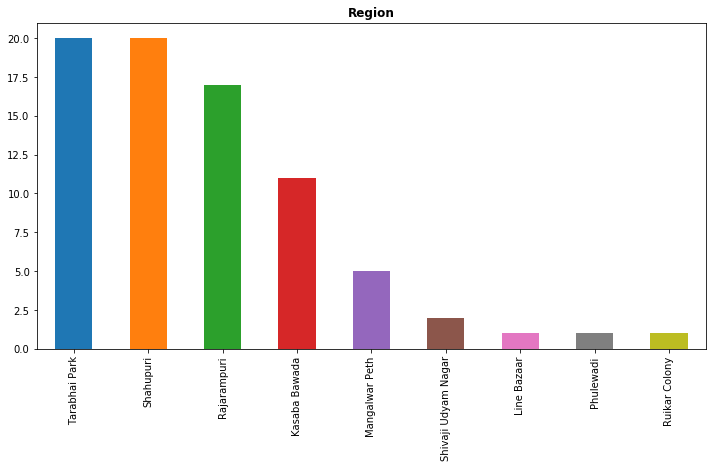

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

ValueError: 'explode' must be of length 'x'

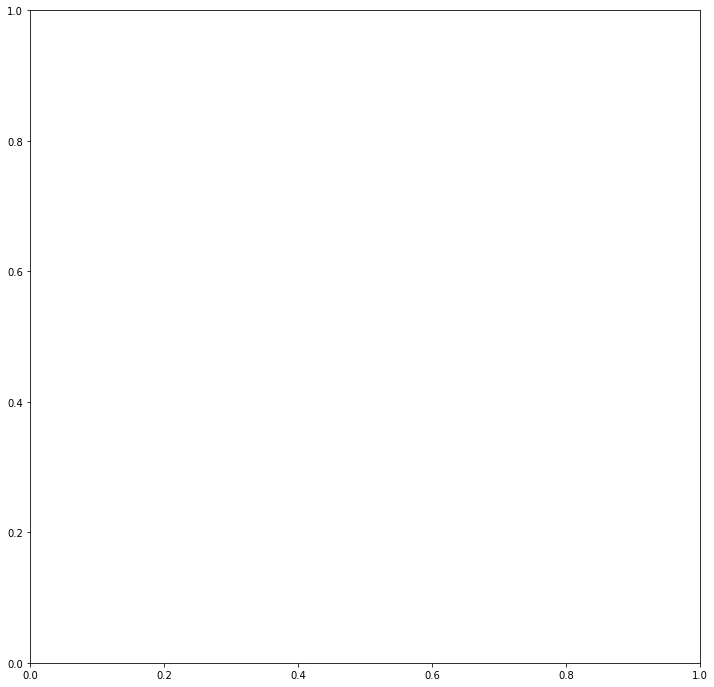

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Good         35
Average      29
Very Good    12
Excellent     2
Name: Rating_Types, dtype: int64

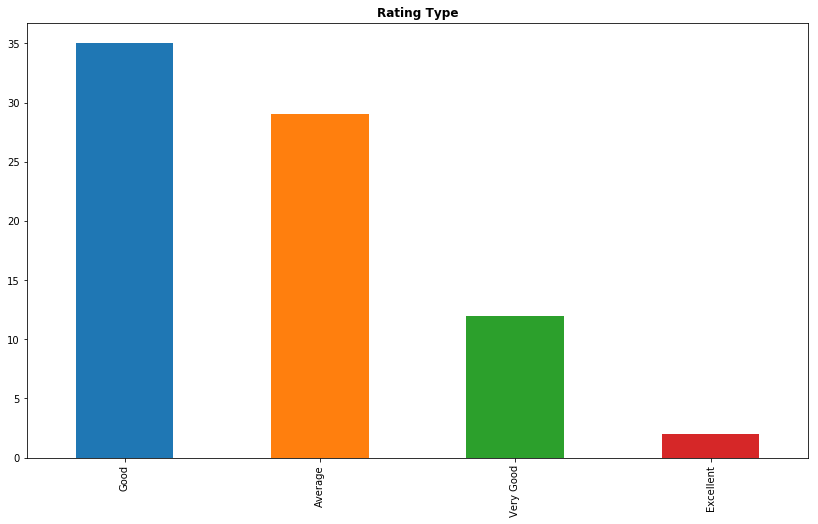

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Casual Dining     43
Quick Bites       17
Café               6
Dessert Parlor     5
Bakery             2
Food Court         2
Bhojanalya         1
Beverage Shop      1
none               1
Name: Cuisine_Type, dtype: int64

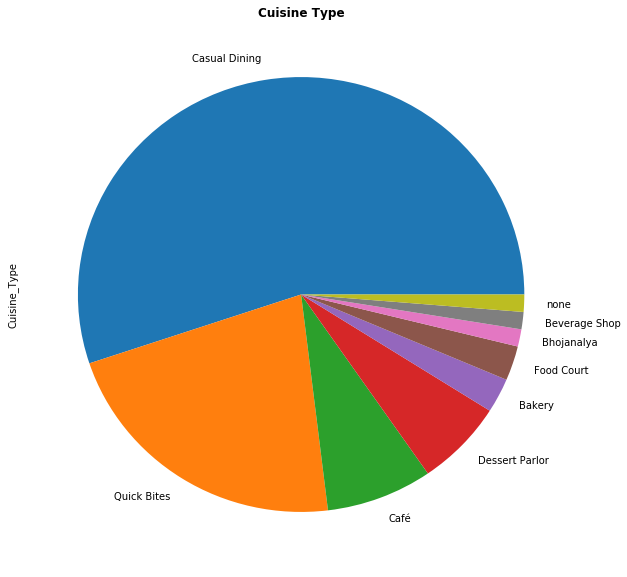

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Casual Dining

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.592207792207794


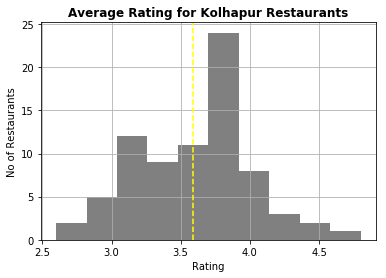

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Kolhapur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [22]:
#Average rating per restaurant in Kolhapur is found to be around 3.6

# Top cuisines in Kolhapur

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

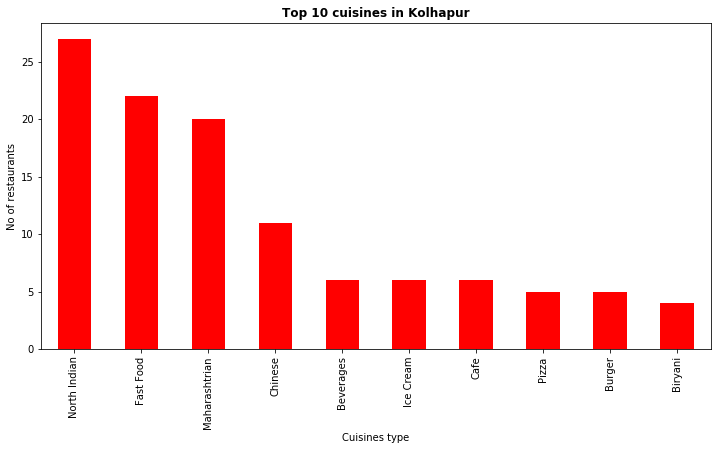

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Kolhapur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

400     12
300     11
200      9
500      8
700      8
800      8
600      6
250      3
1000     3
100      3
350      2
850      1
1200     1
60       1
150      1
Name: Price, dtype: int64

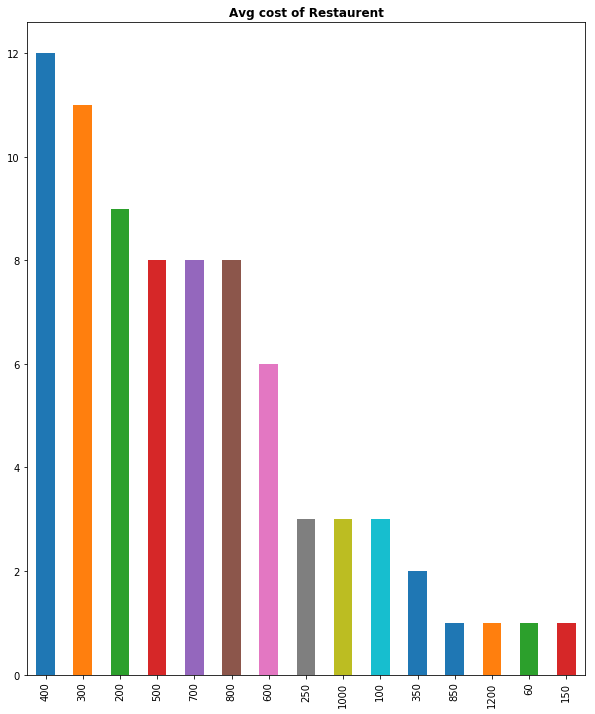

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

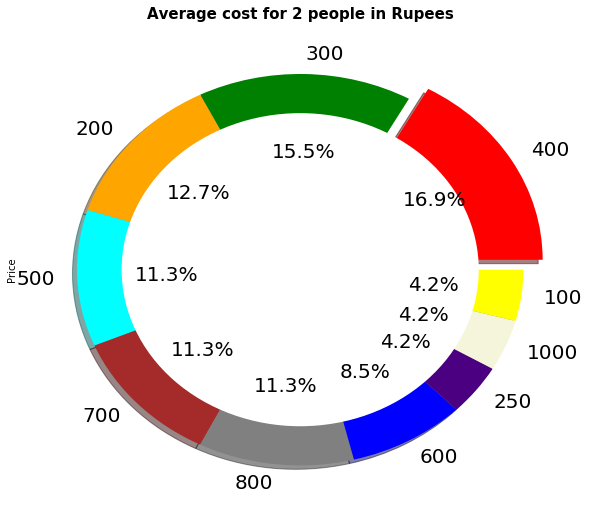

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 400